# Analysis of the Risk and Return of Different Portfolio Construction Strategies
Author: Mario Francisco Montana

First, we import the necessary libraries and load the datasets.

In [1]:
import pandas as pd
import numpy as np
import math
from datetime import datetime

When choosing securities for an investment portfolio, it is important to employ diversification as it helps to spread the risks and minimize the impact of any negative events that may affect a particular industry or sector. Hence, I opted for a portfolio consisting of:

1. AMRT

Sector: Trade Services Investment, Industry: Retail Trade

The retail industry is known for its resilience and is expected to grow in the coming years, making it a good choice for investment.

2. BBCA

Sector: Finance, Industry: Bank

The finance sector is renowned for offering stability to investment portfolios, making it a viable option for investors who desire a steady and reliable return on their investment.

3. BBRI

Sector: Finance, Industry: Bank

As stated above, the finance sector provides stability to portfolios, attracting investors seeking reliable returns.

4. MDKA

Sector: Mining, Industry: Metal and Mineral Mining

This sector is known for its cyclical nature, and investments in this sector can provide good returns when the demand for metals and minerals is high.

5. SIDO

Sector: Consumer Goods Industry, Industry: Pharmaceuticals

This sector is expected to grow in the coming years, as the demand for healthcare and pharmaceutical products continues to increase.

In [2]:
date_format = lambda x : datetime.strptime(x, "%Y-%m-%d")

# Load the datasets and change format of Date column
df_JKSE = pd.read_csv("datasets/JKSE.csv", parse_dates = ["Date"], date_parser = date_format)
df_AMRT = pd.read_csv("datasets/AMRT.csv", parse_dates = ["Date"], date_parser = date_format)
df_BBCA = pd.read_csv("datasets/BBCA.csv", parse_dates = ["Date"], date_parser = date_format)
df_BBRI = pd.read_csv("datasets/BBRI.csv", parse_dates = ["Date"], date_parser = date_format)
df_MDKA = pd.read_csv("datasets/MDKA.csv", parse_dates = ["Date"], date_parser = date_format)
df_SIDO = pd.read_csv("datasets/SIDO.csv", parse_dates = ["Date"], date_parser = date_format)

We then compute the daily returns for each of the five securities and the Jakarta Composite Index (JCI) from
January 2018 to December 2022.

In [3]:
all_df_stocks = [df_AMRT, df_BBCA, df_BBRI, df_MDKA, df_SIDO, df_JKSE]
all_names = ["AMRT", "BBCA", "BBRI", "MDKA", "SIDO", "JKSE"]

for name in all_df_stocks: 
    name["Date"] = pd.to_datetime(name["Date"])
    name["Daily Return"] = name["Adj Close"].pct_change(1)
    name["Daily Return + 1"] = name["Daily Return"] + 1

The annualised returns and annualised standard deviations from 2018 to 2022 of the JCI and the 5 stocks are given below, with the assumption of 240 trading days.

In [4]:
# Create 5 new dataframes grouped by year
df_JKSE_2018 = df_JKSE.loc[(df_JKSE["Date"] > "2017-12-31") & (df_JKSE["Date"] < "2019-01-01")]
df_JKSE_2019 = df_JKSE.loc[(df_JKSE["Date"] > "2018-12-31") & (df_JKSE["Date"] < "2020-01-01")]
df_JKSE_2020 = df_JKSE.loc[(df_JKSE["Date"] > "2019-12-31") & (df_JKSE["Date"] < "2021-01-01")]
df_JKSE_2021 = df_JKSE.loc[(df_JKSE["Date"] > "2020-12-31") & (df_JKSE["Date"] < "2022-01-01")]
df_JKSE_2022 = df_JKSE.loc[(df_JKSE["Date"] > "2021-12-31") & (df_JKSE["Date"] < "2023-01-01")]
yearly_JKSE = [df_JKSE_2018, df_JKSE_2019, df_JKSE_2020, df_JKSE_2021, df_JKSE_2022]

annualized_returns_JKSE = []
annualized_sd_JKSE = []

# For each year, compute the annualized return and annualized standard deviation
for JKSE_year in yearly_JKSE:
    filtered_JKSE_year = JKSE_year.loc[JKSE_year["Daily Return"].notna()]
    annualized_return = (np.product(filtered_JKSE_year["Daily Return + 1"])) - 1

    sd = np.std(JKSE_year[["Daily Return"]])
    #assume 240 trading days each year
    annualized_sd = sd * math.sqrt(240)
    annualized_returns_JKSE.append(annualized_return)
    annualized_sd_JKSE.append(annualized_sd.values[0])

for i in range(5):
    print("Annualised return " + str(i + 2018) + ": " + str(annualized_returns_JKSE[i]))
    print("Annualised standard deviation " + str(i + 2018) + ": " + str(annualized_sd_JKSE[i]))

Annualised return 2018: -0.025356283844752858
Annualised standard deviation 2018: 0.150650485199881
Annualised return 2019: 0.016957147327034905
Annualised standard deviation 2019: 0.10714631007064308
Annualised return 2020: -0.050871312614321096
Annualised standard deviation 2020: 0.2617728667192808
Annualised return 2021: 0.10075285376475795
Annualised standard deviation 2021: 0.1331817487500244
Annualised return 2022: 0.04089310123448664
Annualised standard deviation 2022: 0.1266630779083456


In [5]:
# Create 5 new dataframes grouped by year
df_AMRT_2018 = df_AMRT.loc[(df_AMRT["Date"] > "2017-12-31") & (df_AMRT["Date"] < "2019-01-01")]
df_AMRT_2019 = df_AMRT.loc[(df_AMRT["Date"] > "2018-12-31") & (df_AMRT["Date"] < "2020-01-01")]
df_AMRT_2020 = df_AMRT.loc[(df_AMRT["Date"] > "2019-12-31") & (df_AMRT["Date"] < "2021-01-01")]
df_AMRT_2021 = df_AMRT.loc[(df_AMRT["Date"] > "2020-12-31") & (df_AMRT["Date"] < "2022-01-01")]
df_AMRT_2022 = df_AMRT.loc[(df_AMRT["Date"] > "2021-12-31") & (df_AMRT["Date"] < "2023-01-01")]
yearly_AMRT = [df_AMRT_2018, df_AMRT_2019, df_AMRT_2020, df_AMRT_2021, df_AMRT_2022]

annualized_returns_AMRT = []
annualized_sd_AMRT = []

# For each year, compute the annualized return and annualized standard deviation
for AMRT_year in yearly_AMRT:
    filtered_AMRT_year = AMRT_year.loc[AMRT_year["Daily Return"].notna()]
    annualized_return = (np.product(filtered_AMRT_year["Daily Return + 1"])) - 1

    sd = np.std(AMRT_year[["Daily Return"]])
    #assume 240 trading days each year
    annualized_sd = sd * math.sqrt(240)
    annualized_returns_AMRT.append(annualized_return)
    annualized_sd_AMRT.append(annualized_sd.values[0])

for i in range(5):
    print("Annualised return " + str(i + 2018) + ": " + str(annualized_returns_AMRT[i]))
    print("Annualised standard deviation " + str(i + 2018) + ": " + str(annualized_sd_AMRT[i]))

Annualised return 2018: 0.5441275881783318
Annualised standard deviation 2018: 0.45117682570749335
Annualised return 2019: -0.05608521049047899
Annualised standard deviation 2019: 0.30155237218706143
Annualised return 2020: -0.06973394429920088
Annualised standard deviation 2020: 0.3855625884889351
Annualised return 2021: 0.5346970475809285
Annualised standard deviation 2021: 0.4828504025196249
Annualised return 2022: 1.2038104366456266
Annualised standard deviation 2022: 0.46341074016130174


In [6]:
# Create 5 new dataframes grouped by year
df_BBCA_2018 = df_BBCA.loc[(df_BBCA["Date"] > "2017-12-31") & (df_BBCA["Date"] < "2019-01-01")]
df_BBCA_2019 = df_BBCA.loc[(df_BBCA["Date"] > "2018-12-31") & (df_BBCA["Date"] < "2020-01-01")]
df_BBCA_2020 = df_BBCA.loc[(df_BBCA["Date"] > "2019-12-31") & (df_BBCA["Date"] < "2021-01-01")]
df_BBCA_2021 = df_BBCA.loc[(df_BBCA["Date"] > "2020-12-31") & (df_BBCA["Date"] < "2022-01-01")]
df_BBCA_2022 = df_BBCA.loc[(df_BBCA["Date"] > "2021-12-31") & (df_BBCA["Date"] < "2023-01-01")]
yearly_BBCA = [df_BBCA_2018, df_BBCA_2019, df_BBCA_2020, df_BBCA_2021, df_BBCA_2022]

annualized_returns_BBCA = []
annualized_sd_BBCA = []

# For each year, compute the annualized return and annualized standard deviation
for BBCA_year in yearly_BBCA:
    filtered_BBCA_year = BBCA_year.loc[BBCA_year["Daily Return"].notna()]
    annualized_return = (np.product(filtered_BBCA_year["Daily Return + 1"])) - 1

    sd = np.std(BBCA_year[["Daily Return"]])
    #assume 240 trading days each year
    annualized_sd = sd * math.sqrt(240)
    
    annualized_returns_BBCA.append(annualized_return)
    annualized_sd_BBCA.append(annualized_sd.values[0])

for i in range(5):
    print("Annualised return " + str(i + 2018) + ": " + str(annualized_returns_BBCA[i]))
    print("Annualised standard deviation " + str(i + 2018) + ": " + str(annualized_sd_BBCA[i]))

Annualised return 2018: 0.20017369633537374
Annualised standard deviation 2018: 0.2135978491811495
Annualised return 2019: 0.30143436487313613
Annualised standard deviation 2019: 0.1476764669795177
Annualised return 2020: 0.033342873511287285
Annualised standard deviation 2020: 0.3720463921005025
Annualised return 2021: 0.09707078689512816
Annualised standard deviation 2021: 0.2250342182408028
Annualised return 2022: 0.19382552000087272
Annualised standard deviation 2022: 0.22239015405834947


In [7]:
# Create 5 new dataframes grouped by year
df_BBRI_2018 = df_BBRI.loc[(df_BBRI["Date"] > "2017-12-31") & (df_BBRI["Date"] < "2019-01-01")]
df_BBRI_2019 = df_BBRI.loc[(df_BBRI["Date"] > "2018-12-31") & (df_BBRI["Date"] < "2020-01-01")]
df_BBRI_2020 = df_BBRI.loc[(df_BBRI["Date"] > "2019-12-31") & (df_BBRI["Date"] < "2021-01-01")]
df_BBRI_2021 = df_BBRI.loc[(df_BBRI["Date"] > "2020-12-31") & (df_BBRI["Date"] < "2022-01-01")]
df_BBRI_2022 = df_BBRI.loc[(df_BBRI["Date"] > "2021-12-31") & (df_BBRI["Date"] < "2023-01-01")]
yearly_BBRI = [df_BBRI_2018, df_BBRI_2019, df_BBRI_2020, df_BBRI_2021, df_BBRI_2022]

annualized_returns_BBRI = []
annualized_sd_BBRI = []

# For each year, compute the annualized return and annualized standard deviation
for BBRI_year in yearly_BBRI:
    filtered_BBRI_year = BBRI_year.loc[BBRI_year["Daily Return"].notna()]
    annualized_return = (np.product(filtered_BBRI_year["Daily Return + 1"])) - 1

    sd = np.std(BBRI_year[["Daily Return"]])
    #assume 240 trading days each year
    annualized_sd = sd * math.sqrt(240)
    
    annualized_returns_BBRI.append(annualized_return)
    annualized_sd_BBRI.append(annualized_sd.values[0])

for i in range(5):
    print("Annualised return " + str(i + 2018) + ": " + str(annualized_returns_BBRI[i]))
    print("Annualised standard deviation " + str(i + 2018) + ": " + str(annualized_sd_BBRI[i]))

Annualised return 2018: 0.03334939075971244
Annualised standard deviation 2018: 0.3317009218536056
Annualised return 2019: 0.2409139204882318
Annualised standard deviation 2019: 0.21571926885548104
Annualised return 2020: -0.01878241752014531
Annualised standard deviation 2020: 0.5129999618848912
Annualised return 2021: 0.00717289327634707
Annualised standard deviation 2021: 0.3083076140430222
Annualised return 2022: 0.2495926919450311
Annualised standard deviation 2022: 0.24822967028319504


In [8]:
# Create 5 new dataframes grouped by year
df_MDKA_2018 = df_MDKA.loc[(df_MDKA["Date"] > "2017-12-31") & (df_MDKA["Date"] < "2019-01-01")]
df_MDKA_2019 = df_MDKA.loc[(df_MDKA["Date"] > "2018-12-31") & (df_MDKA["Date"] < "2020-01-01")]
df_MDKA_2020 = df_MDKA.loc[(df_MDKA["Date"] > "2019-12-31") & (df_MDKA["Date"] < "2021-01-01")]
df_MDKA_2021 = df_MDKA.loc[(df_MDKA["Date"] > "2020-12-31") & (df_MDKA["Date"] < "2022-01-01")]
df_MDKA_2022 = df_MDKA.loc[(df_MDKA["Date"] > "2021-12-31") & (df_MDKA["Date"] < "2023-01-01")]
yearly_MDKA = [df_MDKA_2018, df_MDKA_2019, df_MDKA_2020, df_MDKA_2021, df_MDKA_2022]

annualized_returns_MDKA = []
annualized_sd_MDKA = []

# For each year, compute the annualized return and annualized standard deviation
for MDKA_year in yearly_MDKA:
    filtered_MDKA_year = MDKA_year.loc[MDKA_year["Daily Return"].notna()]
    annualized_return = (np.product(filtered_MDKA_year["Daily Return + 1"])) - 1

    sd = np.std(MDKA_year[["Daily Return"]])
    #assume 240 trading days each year
    annualized_sd = sd * math.sqrt(240)
    
    annualized_returns_MDKA.append(annualized_return)
    annualized_sd_MDKA.append(annualized_sd.values[0])

for i in range(5):
    print("Annualised return " + str(i + 2018) + ": " + str(annualized_returns_MDKA[i]))
    print("Annualised standard deviation " + str(i + 2018) + ": " + str(annualized_sd_MDKA[i]))

Annualised return 2018: 0.7051099912744381
Annualised standard deviation 2018: 0.4110604319926656
Annualised return 2019: 0.5285714285714289
Annualised standard deviation 2019: 0.3411750453046504
Annualised return 2020: 1.271028037383175
Annualised standard deviation 2020: 0.5289958925877202
Annualised return 2021: 0.6008230452674901
Annualised standard deviation 2021: 0.4936916037432619
Annualised return 2022: 0.05912596401028436
Annualised standard deviation 2022: 0.48393583788212585


In [9]:
# Create 5 new dataframes grouped by year
df_SIDO_2018 = df_SIDO.loc[(df_SIDO["Date"] > "2017-12-31") & (df_SIDO["Date"] < "2019-01-01")]
df_SIDO_2019 = df_SIDO.loc[(df_SIDO["Date"] > "2018-12-31") & (df_SIDO["Date"] < "2020-01-01")]
df_SIDO_2020 = df_SIDO.loc[(df_SIDO["Date"] > "2019-12-31") & (df_SIDO["Date"] < "2021-01-01")]
df_SIDO_2021 = df_SIDO.loc[(df_SIDO["Date"] > "2020-12-31") & (df_SIDO["Date"] < "2022-01-01")]
df_SIDO_2022 = df_SIDO.loc[(df_SIDO["Date"] > "2021-12-31") & (df_SIDO["Date"] < "2023-01-01")]
yearly_SIDO = [df_SIDO_2018, df_SIDO_2019, df_SIDO_2020, df_SIDO_2021, df_SIDO_2022]

annualized_returns_SIDO = []
annualized_sd_SIDO = []

# For each year, compute the annualized return and annualized standard deviation
for SIDO_year in yearly_SIDO:
    filtered_SIDO_year = SIDO_year.loc[SIDO_year["Daily Return"].notna()]
    annualized_return = (np.product(filtered_SIDO_year["Daily Return + 1"])) - 1

    sd = np.std(SIDO_year[["Daily Return"]])
    #assume 240 trading days each year
    annualized_sd = sd * math.sqrt(240)
    
    annualized_returns_SIDO.append(annualized_return)
    annualized_sd_SIDO.append(annualized_sd.values[0])

for i in range(5):
    print("Annualised return " + str(i + 2018) + ": " + str(annualized_returns_SIDO[i]))
    print("Annualised standard deviation " + str(i + 2018) + ": " + str(annualized_sd_SIDO[i]))

Annualised return 2018: 0.6258826374197752
Annualised standard deviation 2018: 0.26815539924417914
Annualised return 2019: 0.6471707856370184
Annualised standard deviation 2019: 0.31641532193042965
Annualised return 2020: 0.3125697187283667
Annualised standard deviation 2020: 0.3729172702870577
Annualised return 2021: 0.13076714461218208
Annualised standard deviation 2021: 0.22579430350681243
Annualised return 2022: -0.08906109256545369
Annualised standard deviation 2022: 0.2631313576498802


The 3 portfolio below are then constructed, with their daily returns calculated given the weights to each stock:

1. Equal-weighted portfolio
2. Minimum variance portfolio
3. A portfolio that maximizes µ<sub>p</sub> − <sup>1</sup>&frasl;<sub>2</sub> (σ<sub>p</sub>)<sup>2</sup>, where µ<sub>p</sub> and σ<sub>p</sub> are the expected portfolio return and the standard deviation of the portfolio return, respectively.

In [ ]:
# Create a new dataframe containing the daily returns of each of the 5 securities
df_combined_daily_returns = pd.DataFrame()

for i in range(len(all_df_stocks) - 1): 
    relevant_df = all_df_stocks[i][["Date", "Daily Return"]]
    relevant_df = relevant_df.rename(columns = {"Daily Return" : f"Daily Return {all_names[i]}"})
    relevant_df = relevant_df.set_index("Date")
    df_combined_daily_returns = df_combined_daily_returns.join(relevant_df, how = "outer")

df_combined_daily_returns = df_combined_daily_returns[df_combined_daily_returns["Daily Return AMRT"].notna()]
df_combined_daily_returns

,Daily Return AMRT,Daily Return BBCA,Daily Return BBRI,Daily Return MDKA,Daily Return SIDO
Date,,,,,
2018-01-01,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01-02,0.024590,0.000000,-0.002747,0.046729,-0.009174
2018-01-03,-0.032000,0.000000,-0.005510,-0.026786,0.018519
2018-01-04,-0.024793,0.014840,-0.016620,0.000000,0.000000
2018-01-05,0.008475,0.001125,0.011267,-0.018349,0.036363
...,...,...,...,...,...
2022-12-26,0.011450,0.008824,0.010246,-0.017456,0.006667
2022-12-27,0.064151,0.002915,-0.012170,0.038071,0.000000
2022-12-28,-0.049645,0.005814,-0.010267,0.000000,0.000000


In [11]:
# Constructing portfolio A
portfolio_a = df_combined_daily_returns.copy()
weight_a = [0.2, 0.2, 0.2, 0.2, 0.2]
cols = ["Daily Return AMRT", "Daily Return BBCA", "Daily Return BBRI", "Daily Return MDKA", "Daily Return SIDO"]

portfolio_a["Daily Return"] = np.average(portfolio_a[cols], weights = weight_a, axis = 1)
portfolio_a

,Daily Return AMRT,Daily Return BBCA,Daily Return BBRI,Daily Return MDKA,Daily Return SIDO,Daily Return
Date,,,,,,
2018-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01-02,0.024590,0.000000,-0.002747,0.046729,-0.009174,0.011880
2018-01-03,-0.032000,0.000000,-0.005510,-0.026786,0.018519,-0.009155
2018-01-04,-0.024793,0.014840,-0.016620,0.000000,0.000000,-0.005315
2018-01-05,0.008475,0.001125,0.011267,-0.018349,0.036363,0.007776
...,...,...,...,...,...,...
2022-12-26,0.011450,0.008824,0.010246,-0.017456,0.006667,0.003946
2022-12-27,0.064151,0.002915,-0.012170,0.038071,0.000000,0.018593
2022-12-28,-0.049645,0.005814,-0.010267,0.000000,0.000000,-0.010820


In [12]:
# Assume 240 trading days and multiply by 240 to annualize the covariance between two assets
covariance_matrix = df_combined_daily_returns.cov() * 240

# Output the covariance matrix that will be used to compute portfolio variance
covariance_matrix

,Daily Return AMRT,Daily Return BBCA,Daily Return BBRI,Daily Return MDKA,Daily Return SIDO
Daily Return AMRT,0.178437,0.015995,0.019053,0.018828,0.010540
Daily Return BBCA,0.015995,0.060434,0.045588,0.018552,0.013332
Daily Return BBRI,0.019053,0.045588,0.114188,0.025776,0.021613
Daily Return MDKA,0.018828,0.018552,0.025776,0.207491,0.006705
Daily Return SIDO,0.010540,0.013332,0.021613,0.006705,0.086289


In [13]:
# Store returns, volatilities (standard deviation), and weights for each of the generated portfolios
portfolio_returns = []
portfolio_volatilities = []
portfolio_weights = []

num_assets = 5
num_portfolios = 10000

# Average annualised return over 2018-2022 for AMRT, BBCA, BBRI, MDKA and SIDO respectively
individual_rets = [0.4314,0.22518,0.1153,0.63292,0.32548]

In [14]:
# Run simulation 10000 times
for port in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    portfolio_weights.append(weights)
    returns = np.dot(weights, individual_rets)
    portfolio_returns.append(returns)

    var = np.transpose(weights)@covariance_matrix@weights
    sd = np.sqrt(var)
    portfolio_volatilities.append(sd)

In [15]:
# Create a dataframe consisting of returns, volatility and weights of securities for each generated portfolio
data = {"Returns": portfolio_returns, "Volatility": portfolio_volatilities}

for counter, symbol in enumerate(df_combined_daily_returns.columns.tolist()):
    data[symbol[-4:] + " weight"] = [w[counter] for w in portfolio_weights]

all_portfolios_generated = pd.DataFrame(data)
all_portfolios_generated

,Returns,Volatility,AMRT weight,BBCA weight,BBRI weight,MDKA weight,SIDO weight
0,0.437802,0.259923,0.060322,0.204636,0.106622,0.484215,0.144205
1,0.350172,0.211692,0.257026,0.397810,0.098111,0.188621,0.058431
2,0.271376,0.231990,0.282949,0.156027,0.419471,0.064208,0.077345
3,0.312213,0.198301,0.223178,0.275646,0.190855,0.100362,0.209959
4,0.357065,0.211410,0.230834,0.167676,0.211673,0.222622,0.167195
...,...,...,...,...,...,...,...
9995,0.300610,0.191298,0.124985,0.385066,0.059472,0.042327,0.388149
9996,0.372589,0.214762,0.155169,0.054390,0.222096,0.269349,0.298997
9997,0.332699,0.200962,0.154505,0.300526,0.186359,0.195698,0.162911
9998,0.299792,0.201965,0.253036,0.291785,0.193440,0.056707,0.205033


In [16]:
min_volatility_portfolio = all_portfolios_generated.iloc[all_portfolios_generated["Volatility"].idxmin()]
min_volatility_portfolio

Returns        0.319589
Volatility     0.188144
AMRT weight    0.097335
BBCA weight    0.444093
BBRI weight    0.024014
MDKA weight    0.108605
SIDO weight    0.325953
Name: 3216, dtype: float64

In [17]:
maximiser_portfolio = all_portfolios_generated.iloc[(all_portfolios_generated["Returns"] - 0.5*((all_portfolios_generated["Volatility"])**2)).idxmax()]
maximiser_portfolio

Returns        0.576225
Volatility     0.367129
AMRT weight    0.123865
BBCA weight    0.007729
BBRI weight    0.006315
MDKA weight    0.779755
SIDO weight    0.082337
Name: 8798, dtype: float64

Text(0, 0.5, 'Expected Returns')

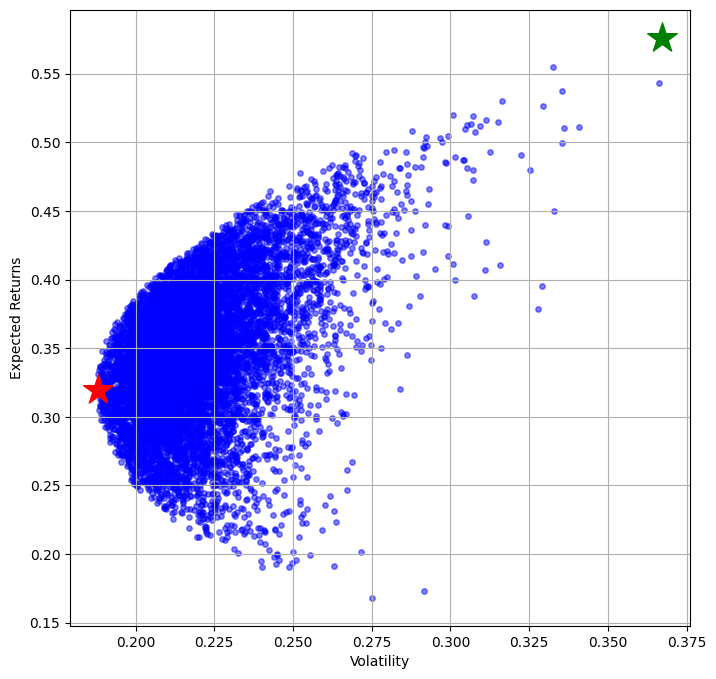

In [18]:
# Plot the efficient frontier
plt = all_portfolios_generated.plot.scatter(x = "Volatility", y = "Returns", marker = "o", color = "b",
                                 s = 15, alpha = 0.5, grid = True, figsize = [8,8])
plt.scatter(min_volatility_portfolio[1], min_volatility_portfolio[0], color='r', marker='*', s=500)
plt.scatter(maximiser_portfolio[1], maximiser_portfolio[0], color='g', marker='*', s=500)

plt.set_xlabel("Volatility")
plt.set_ylabel("Expected Returns")

In [19]:
portfolio_b = df_combined_daily_returns.copy()
weight_b = min_volatility_portfolio[2:]
cols = ["Daily Return AMRT", "Daily Return BBCA", "Daily Return BBRI", "Daily Return MDKA", "Daily Return SIDO"]

portfolio_b["Daily Return"] = np.average(portfolio_b[cols], weights = weight_b, axis = 1)
portfolio_b

,Daily Return AMRT,Daily Return BBCA,Daily Return BBRI,Daily Return MDKA,Daily Return SIDO,Daily Return
Date,,,,,,
2018-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01-02,0.024590,0.000000,-0.002747,0.046729,-0.009174,0.004412
2018-01-03,-0.032000,0.000000,-0.005510,-0.026786,0.018519,-0.000120
2018-01-04,-0.024793,0.014840,-0.016620,0.000000,0.000000,0.003778
2018-01-05,0.008475,0.001125,0.011267,-0.018349,0.036363,0.011455
...,...,...,...,...,...,...
2022-12-26,0.011450,0.008824,0.010246,-0.017456,0.006667,0.005556
2022-12-27,0.064151,0.002915,-0.012170,0.038071,0.000000,0.011381
2022-12-28,-0.049645,0.005814,-0.010267,0.000000,0.000000,-0.002497


In [20]:
portfolio_c = df_combined_daily_returns.copy()
weight_c = maximiser_portfolio[2:]
cols = ["Daily Return AMRT", "Daily Return BBCA", "Daily Return BBRI", "Daily Return MDKA", "Daily Return SIDO"]

portfolio_c["Daily Return"] = np.average(portfolio_c[cols], weights = weight_c, axis = 1)
portfolio_c

,Daily Return AMRT,Daily Return BBCA,Daily Return BBRI,Daily Return MDKA,Daily Return SIDO,Daily Return
Date,,,,,,
2018-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01-02,0.024590,0.000000,-0.002747,0.046729,-0.009174,0.038710
2018-01-03,-0.032000,0.000000,-0.005510,-0.026786,0.018519,-0.023360
2018-01-04,-0.024793,0.014840,-0.016620,0.000000,0.000000,-0.003061
2018-01-05,0.008475,0.001125,0.011267,-0.018349,0.036363,-0.010184
...,...,...,...,...,...,...
2022-12-26,0.011450,0.008824,0.010246,-0.017456,0.006667,-0.011512
2022-12-27,0.064151,0.002915,-0.012170,0.038071,0.000000,0.037578
2022-12-28,-0.049645,0.005814,-0.010267,0.000000,0.000000,-0.006169


The code below gives the expected return and the standard deviation of the portfolio return.

In [21]:
# Portfolio A
portfolio_a["Daily Return + 1"] = portfolio_a["Daily Return"] + 1
expected_return = (np.product(portfolio_a["Daily Return + 1"])) - 1

sd = np.std(portfolio_a[["Daily Return"]])

#assume 240 trading days each year
annualized_sd = sd * math.sqrt(240*5)

print("Expected return: " + str(expected_return))
print("Standard deviation of return: " + str(annualized_sd.values[0]))

Expected return: 3.433050577757358
Standard deviation of return: 0.4556258751398506


In [22]:
# Portfolio B
portfolio_b["Daily Return + 1"] = portfolio_b["Daily Return"] + 1
expected_return = (np.product(portfolio_b["Daily Return + 1"])) - 1

sd = np.std(portfolio_b[["Daily Return"]])

#assume 240 trading days each year
annualized_sd = sd * math.sqrt(240*5)

print("Expected return: " + str(expected_return))
print("Standard deviation of return: " + str(annualized_sd.values[0]))

Expected return: 2.746159625260591
Standard deviation of return: 0.4205343957958896


In [23]:
# Portfolio C
portfolio_c["Daily Return + 1"] = portfolio_c["Daily Return"] + 1
expected_return = (np.product(portfolio_c["Daily Return + 1"])) - 1

sd = np.std(portfolio_c[["Daily Return"]])

#assume 240 trading days each year
annualized_sd = sd * math.sqrt(240*5)

print("Expected return: " + str(expected_return))
print("Standard deviation of return: " + str(annualized_sd.values[0]))

Expected return: 8.454500924815116
Standard deviation of return: 0.8205971215574436


The daily return of the portfolio can be modelled by the relation r<sub>p</sub> = α + βr<sub>m</sub>, where r<sub>p</sub> is the daily portfolio return, α is a measure of the excess return of a portfolio over its expected return based on its level of systematic risk as measured by its β, and β is a measure of a portfolio's sensitivity to changes in the overall market. We compute the portfolio α and β below.

In [24]:
# Portfolio A
from sklearn.linear_model import LinearRegression

X = df_JKSE[1:]["Daily Return"]
y = portfolio_a["Daily Return"]

lm = LinearRegression()
model = lm.fit(X.values.reshape(-1, 1), y)

print(f"alpha = {model.intercept_}")
print(f"beta = {model.coef_[0]}")

alpha = 0.0011676855128738767
beta = 0.9165174066740264


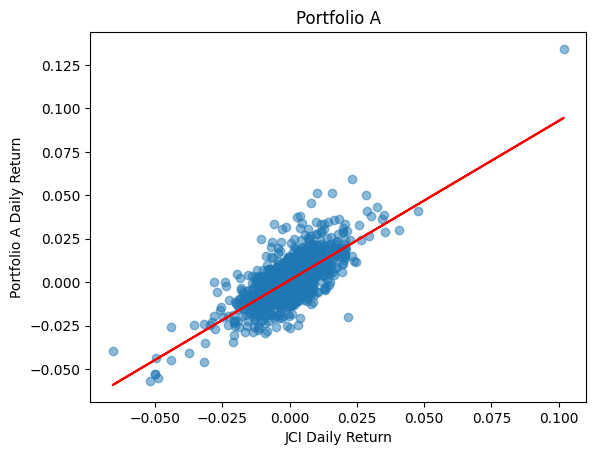

In [25]:
import matplotlib.pyplot as plt

y_pred = lm.predict(X.values.reshape(-1, 1))

fig, ax = plt.subplots()
ax.scatter(X, y, alpha=0.5)

ax.plot(X, y_pred, color="red")

ax.set_xlabel("JCI Daily Return")
ax.set_ylabel("Portfolio A Daily Return")
ax.set_title("Portfolio A")

plt.show()

In [26]:
# Portfolio B
from sklearn.linear_model import LinearRegression

X = df_JKSE[1:]["Daily Return"]
y = portfolio_b["Daily Return"]

lm = LinearRegression()
model = lm.fit(X.values.reshape(-1, 1), y)

print(f"alpha = {model.intercept_}")
print(f"beta = {model.coef_[0]}")

alpha = 0.0010300798067620636
beta = 0.8358693632783598


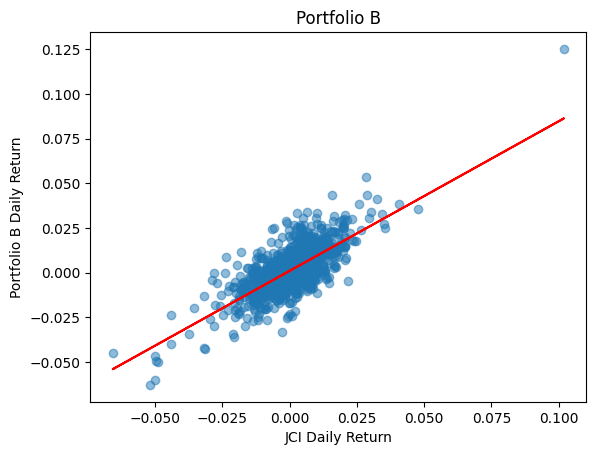

In [27]:
import matplotlib.pyplot as plt

y_pred = lm.predict(X.values.reshape(-1, 1))

fig, ax = plt.subplots()
ax.scatter(X, y, alpha=0.5)

ax.plot(X, y_pred, color="red")

ax.set_xlabel("JCI Daily Return")
ax.set_ylabel("Portfolio B Daily Return")
ax.set_title("Portfolio B")

plt.show()

In [28]:
# Portfolio C
from sklearn.linear_model import LinearRegression

X = df_JKSE[1:]["Daily Return"]
y = portfolio_c["Daily Return"]

lm = LinearRegression()
model = lm.fit(X.values.reshape(-1, 1), y)

print(f"alpha = {model.intercept_}")
print(f"beta = {model.coef_[0]}")

alpha = 0.001978362605851849
beta = 0.77785753512785


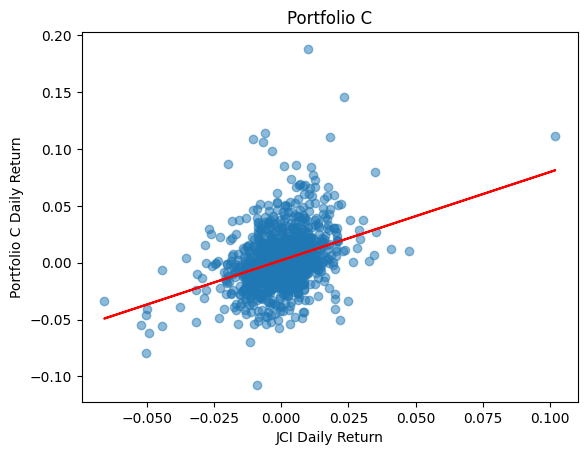

In [29]:
import matplotlib.pyplot as plt

y_pred = lm.predict(X.values.reshape(-1, 1))

fig, ax = plt.subplots()
ax.scatter(X, y, alpha=0.5)

ax.plot(X, y_pred, color="red")

ax.set_xlabel("JCI Daily Return")
ax.set_ylabel("Portfolio C Daily Return")
ax.set_title("Portfolio C")

# Show the plot
plt.show()

A higher beta implies higher market risk sensitivity and potentially higher returns as well. However, it also means higher volatility and downside risk. Conversely, a lower beta implies lower market risk sensitivity and returns, but also lower volatility and downside risk.

The portfolios in ascending order of beta values are portfolios C, B and A. Portfolio C has the lowest correlation with the JKSE index. This suggests that portfolio C is the optimal portfolio in “beating the market” and generates more stable returns when the market is experiencing high levels of volatility.

We calculate the 1%-VaR and 5%-VaR below, the probability of a loss greater than 1% and 5%. Start by assigning an appropriate distribution for the returns of each portfolio.

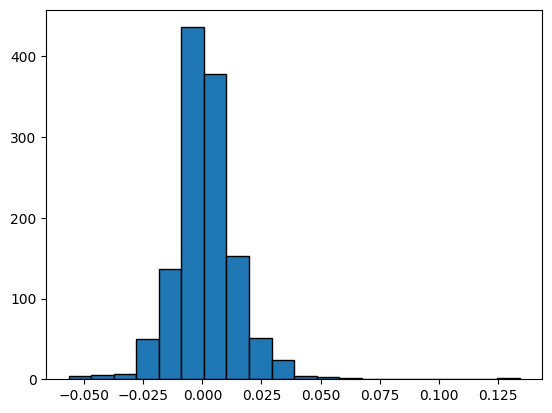

In [30]:
# Portfolio A
# Create histogram to check if normally distributed
import matplotlib.pyplot as plt

returns_a = portfolio_a["Daily Return"]

plt.hist(returns_a, edgecolor='black', bins=20)
plt.show()

Histogram appears to exhibit a positive skew.

Alpha: 1.2465693171385364, loc: -0.008966915758747895, scale: 0.01666969349173599


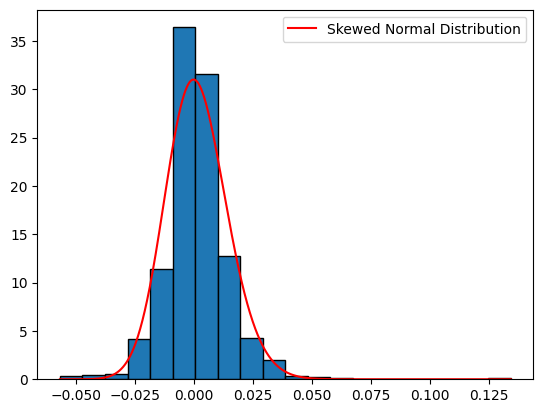

In [31]:
from scipy.stats import skewnorm
import numpy as np
import matplotlib.pyplot as plt

# fit() estimates the parameters that best fit the data using maximum likelihood estimation
alpha_a, loc_a, scale_a = skewnorm.fit(returns_a)

# alpha is the shape parameter for the skewness
# loc is the location parameter for the mean
# scale is the scale parameter for the standard deviation
print(f"Alpha: {alpha_a}, loc: {loc_a}, scale: {scale_a}")

# Fit the Skewed Normal distribution to the data
df = len(returns_a) - 1
distribution = skewnorm(alpha_a, loc=loc_a, scale=scale_a)

# Create histogram to check the distribution of daily returns
plt.hist(returns_a, bins=20, edgecolor='black', density=True)

# Generate x-values for plotting the Skewed Normal distribution
x = np.linspace(returns_a.min(), returns_a.max(), 1000)

# Plot the Skewed Normal distribution on top of the histogram
plt.plot(x, distribution.pdf(x), 'r-', label='Skewed Normal Distribution')

plt.legend()
plt.show()

In [32]:
from scipy.stats import skewnorm

# calculate the 1% and 5% VaR using the fitted distribution
var_1pct = skewnorm.ppf(0.01, alpha_a, loc=loc_a, scale=scale_a)
var_5pct = skewnorm.ppf(0.05, alpha_a, loc=loc_a, scale=scale_a)
print('1% VaR:', var_1pct)
print('5% VaR:', var_5pct)

1% VaR: -0.02707284909864792
5% VaR: -0.019194501565628824


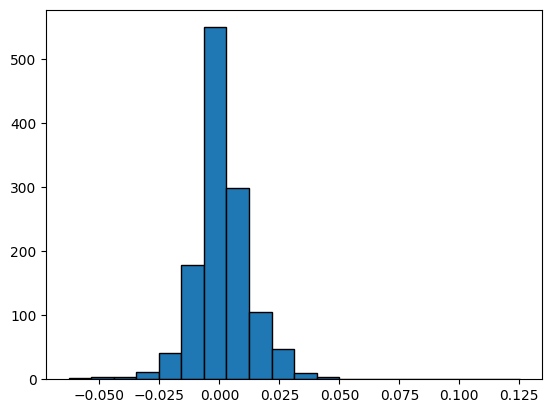

In [33]:
# Portfolio B
# Create histogram to check if normally distributed
import matplotlib.pyplot as plt

returns_b = portfolio_b["Daily Return"]

plt.hist(returns_b, edgecolor='black', bins=20)
plt.show()

Alpha: 1.099365119387482, loc: -0.0076008872985505104, scale: 0.014951589112113289


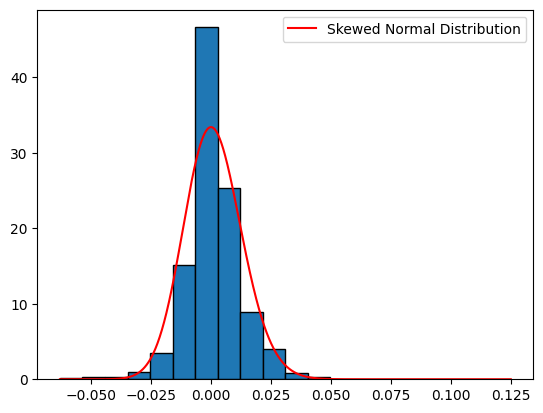

In [34]:
from scipy.stats import skewnorm
import numpy as np
import matplotlib.pyplot as plt

# fit() estimates the parameters that best fit the data using maximum likelihood estimation
alpha_b, loc_b, scale_b = skewnorm.fit(returns_b)

# alpha is the shape parameter for the skewness
# loc is the location parameter for the mean
# scale is the scale parameter for the standard deviation
print(f"Alpha: {alpha_b}, loc: {loc_b}, scale: {scale_b}")

# Fit the Skewed Normal distribution to the data
df = len(returns_b) - 1
distribution = skewnorm(alpha_b, loc=loc_b, scale=scale_b)

# Create histogram to check the distribution of daily returns
plt.hist(returns_b, bins=20, edgecolor='black', density=True)

# Generate x-values for plotting the Skewed Normal distribution
x = np.linspace(returns_b.min(), returns_b.max(), 1000)

# Plot the Skewed Normal distribution on top of the histogram
plt.plot(x, distribution.pdf(x), 'r-', label='Skewed Normal Distribution')

plt.legend()
plt.show()

In [35]:
from scipy.stats import skewnorm

# calculate the 1% and 5% VaR using the fitted distribution
var_1pct = skewnorm.ppf(0.01, alpha_b, loc=loc_b, scale=scale_b)
var_5pct = skewnorm.ppf(0.05, alpha_b, loc=loc_b, scale=scale_b)
print('1% VaR:', var_1pct)
print('5% VaR:', var_5pct)

1% VaR: -0.02551041531900669
5% VaR: -0.01801813695364629


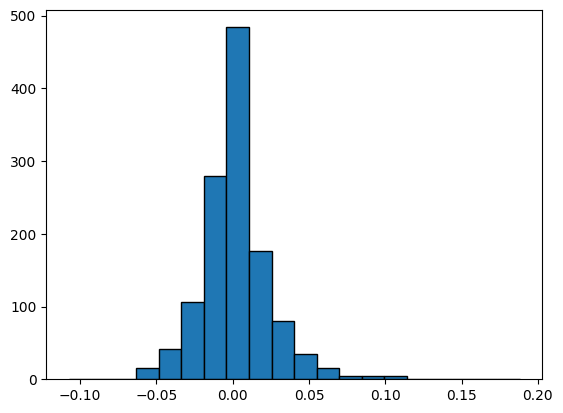

In [36]:
# Portfolio C
# Create histogram to check if normally distributed
import matplotlib.pyplot as plt

returns_c = portfolio_c["Daily Return"]

plt.hist(returns_c, edgecolor='black', bins=20)
plt.show()

Alpha: 1.7073355161392323, loc: -0.01949516655121373, scale: 0.03203362726955497


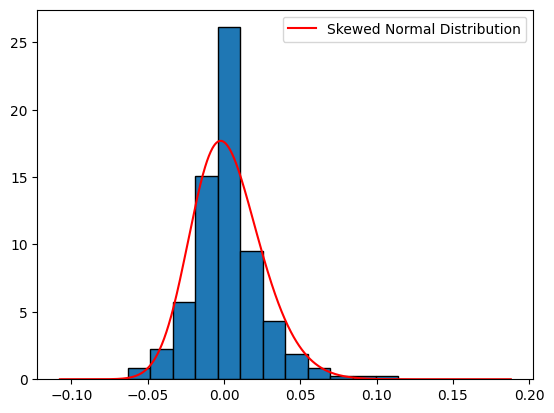

In [37]:
from scipy.stats import skewnorm
import numpy as np
import matplotlib.pyplot as plt

# fit() estimates the parameters that best fit the data using maximum likelihood estimation
alpha_c, loc_c, scale_c = skewnorm.fit(returns_c)

# alpha is the shape parameter for the skewness
# loc is the location parameter for the mean
# scale is the scale parameter for the standard deviation
print(f"Alpha: {alpha_c}, loc: {loc_c}, scale: {scale_c}")

# Fit the Skewed Normal distribution to the data
df = len(returns_c) - 1
distribution = skewnorm(alpha_c, loc=loc_c, scale=scale_c)

# Create histogram to check the distribution of daily returns
plt.hist(returns_c, bins=20, edgecolor='black', density=True)

# Generate x-values for plotting the Skewed Normal distribution
x = np.linspace(returns_c.min(), returns_c.max(), 1000)

# Plot the Skewed Normal distribution on top of the histogram
plt.plot(x, distribution.pdf(x), 'r-', label='Skewed Normal Distribution')

plt.legend()
plt.show()

In [38]:
from scipy.stats import skewnorm

# calculate the 1% and 5% VaR using the fitted distribution
var_1pct = skewnorm.ppf(0.01, alpha_c, loc=loc_c, scale=scale_c)
var_5pct = skewnorm.ppf(0.05, alpha_c, loc=loc_c, scale=scale_c)
print('1% VaR:', var_1pct)
print('5% VaR:', var_5pct)

1% VaR: -0.04568016750602216
5% VaR: -0.032937275791858484


The ascending order of portfolios, based on both 1\%-VaR and 5\%-VaR values, is B, A, and C. Assuming that the initial capital allocated to each portfolio in the beginning of the period were equal, portfolio C is expected to incur the largest loss. This complements the fact that portfolio C is the riskiest portfolio as the standard deviation of its daily returns is also the highest among the 3 portfolios. On the other hand, portfolio B is the minimum variance portfolio as reflected by it having the lowest standard deviation of daily returns. Hence, it is expected to incur the least amount of losses.

We calculate the maximum drawdown (MDD) over a period of 5 years, which is the maximum observed loss, in percentage, that can happen over the given period, for the JCI index and the 3 portfolios.

In [39]:
portfolio_a_cum_returns = (portfolio_a["Daily Return + 1"]).cumprod()
portfolio_a_peaks = portfolio_a_cum_returns.cummax()
portfolio_a_drawdowns = (portfolio_a_cum_returns - portfolio_a_peaks) / portfolio_a_peaks
portfolio_a_max_drawdown = portfolio_a_drawdowns.min()

portfolio_b_cum_returns = (portfolio_b["Daily Return + 1"]).cumprod()
portfolio_b_peaks = portfolio_b_cum_returns.cummax()
portfolio_b_drawdowns = (portfolio_b_cum_returns - portfolio_b_peaks) / portfolio_b_peaks
portfolio_b_max_drawdown = portfolio_b_drawdowns.min()

portfolio_c_cum_returns = (portfolio_c["Daily Return + 1"]).cumprod()
portfolio_c_peaks = portfolio_c_cum_returns.cummax()
portfolio_c_drawdowns = (portfolio_c_cum_returns - portfolio_c_peaks) / portfolio_c_peaks
portfolio_c_max_drawdown = portfolio_c_drawdowns.min()

JKSE_cum_returns = (df_JKSE["Daily Return + 1"][1:]).cumprod()
JKSE_peaks = JKSE_cum_returns.cummax()
JKSE_drawdowns = (JKSE_cum_returns - JKSE_peaks) / JKSE_peaks
JKSE_max_drawdown = JKSE_drawdowns.min()

print("MDD Portfolio A: " + str(portfolio_a_max_drawdown))
print("MDD Portfolio B: " + str(portfolio_b_max_drawdown))
print("MDD Portfolio C: " + str(portfolio_c_max_drawdown))
print("MDD JKSE: " + str(JKSE_max_drawdown))

MDD Portfolio A: -0.31209661318970455
MDD Portfolio B: -0.29676379406524134
MDD Portfolio C: -0.3270001601765826
MDD JKSE: -0.41135250799712636


The JCI had the largest MDD value (-0.4114), indicating that it experienced the largest percentage loss during the period. Portfolio B had the smallest MDD value (-0.2944), indicating that it was the most resilient to losses during the period. This is in line with the fact that portfolio B is the minimum variance portfolio. Portfolios A and C had MDD values of -0.3121 and -0.3385, respectively. The fact that portfolio C maxiizes the expected portfolio return provides an intuition as to why it had the highest MDD value among the 3 portfolios. Ultimately, all 3 portfolios managed to fare better than the JCI.